<a href="https://colab.research.google.com/github/johnarban/collab_notebooks/blob/main/in_class/messier_plot_in_class_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First things

First things is always to import the modules we will need. You may also need to install `astroquery`

Remember to move through a notebook from top to bottom.

In [2]:
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 kB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 60.2 MB/s eta 0:00:00


In [4]:
from astroquery.simbad import Simbad # astronomy database of objects

# need to work with units
import astropy.units as u # units

# need to work with coordinates
import astropy.coordinates as coord # work with coordinates like ra/dec

import numpy as np # arrays
import matplotlib.pyplot as plt # plotting

In [ ]:
# Make a list of interesting objects. We will do messier objects

# messier objects are named M1, M2, .... M101
# will want strings 'M1', 'M2', .....

In [5]:
# Make a list of messier objects

messier_objects = []

max_value = 101

i = 1

while i <= max_value:
  messier_name = 'M{i}'.format(i=i)
  messier_objects.append(messier_name)
  i = i + 1

# for j in range(1, max_value + 1):
#   messier_objects.append(f'M{j}')

print(messier_objects)

['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'M15', 'M16', 'M17', 'M18', 'M19', 'M20', 'M21', 'M22', 'M23', 'M24', 'M25', 'M26', 'M27', 'M28', 'M29', 'M30', 'M31', 'M32', 'M33', 'M34', 'M35', 'M36', 'M37', 'M38', 'M39', 'M40', 'M41', 'M42', 'M43', 'M44', 'M45', 'M46', 'M47', 'M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62', 'M63', 'M64', 'M65', 'M66', 'M67', 'M68', 'M69', 'M70', 'M71', 'M72', 'M73', 'M74', 'M75', 'M76', 'M77', 'M78', 'M79', 'M80', 'M81', 'M82', 'M83', 'M84', 'M85', 'M86', 'M87', 'M88', 'M89', 'M90', 'M91', 'M92', 'M93', 'M94', 'M95', 'M96', 'M97', 'M98', 'M99', 'M100', 'M101']


# Simbad

Simbad is an astronomical database that allows us to query for astronomical objects. We will use it to get the coordinates of the Messier objects.

In [7]:
# the ? is a shortcut to the documentation
?Simbad.query_objects

In [8]:
simbad_table = Simbad.query_objects(messier_objects)

In [9]:
simbad_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
M 1,05 34 30.9,+22 00 53,5,5,18500.000,18500.000,0,E,R,1995AuJPh..48..143S,1
M 2,21 33 27.02,-00 49 23.7,6,6,--,--,0,D,O,2010AJ....140.1830G,2
M 3,13 42 11.62,+28 22 38.2,6,6,--,--,0,D,O,2010AJ....140.1830G,3
M 4,16 23 35.22,-26 31 32.7,6,6,--,--,0,D,O,2010AJ....140.1830G,4
M 5,15 18 33.22,+02 04 51.7,6,6,--,--,0,D,O,2010AJ....140.1830G,5
NGC 6405,17 40 16.6,-32 14 31,5,5,--,--,0,D,O,2021A&A...647A..19T,6
NGC 6475,17 53 47.3,-34 50 28,5,5,--,--,0,D,O,2021A&A...647A..19T,7
M 8,18 03 37,-24 23.2,4,4,--,--,0,E,,,8


In [20]:
simbad_table['MAIN_ID'][94]

'M  95'

In [27]:
select_m95 = simbad_table['MAIN_ID'] == 'M   1'
simbad_table[select_m95]

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
M 97,11 14 47.7122,+55 01 08.482,14,14,0.027,0.031,90,A,O,2020yCat.1350....0G,97


We need to extract the RA and DEC columns


In [28]:
ra, dec = simbad_table["RA"], simbad_table["DEC"]

# what type of object are the elements of ra, dec

In [29]:

# we need to get them to behave likt numbers. We will let astropy.coords handle this
coords = coord.SkyCoord(ra, dec, unit=(u.hourangle, u.deg))

# Basic Plot

You can make a basic plot with one line of code

RA is usually on the x-axis because it goes left-right on the sky

DEC is usally on the y-axis because it goes up-down on the sky

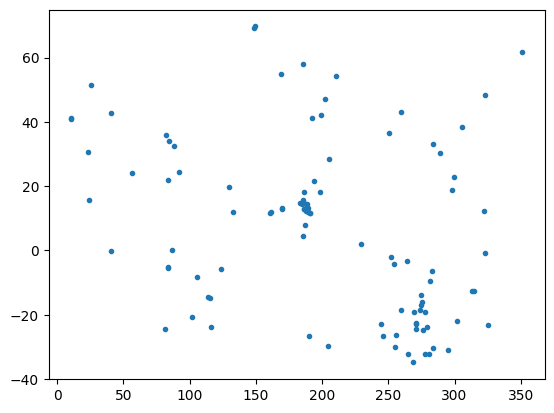

In [31]:
plt.plot(coords.ra, coords.dec,'.')

# Make a plot of the messier objects

Here we will use a [Mollweide projection](https://en.wikipedia.org/wiki/Mollweide_projection) to show the points on a RA/DEC view of the sky.

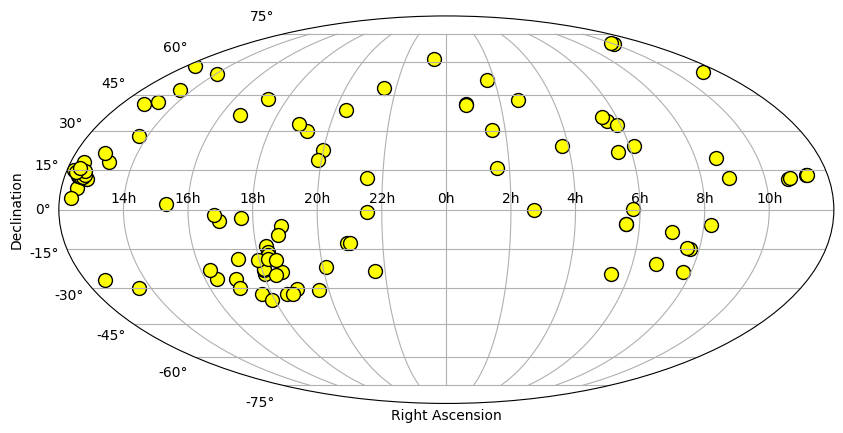

In [66]:
# mollewiede projection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(coords.ra.wrap_at(180 * u.deg).radian, coords.dec.radian, s = 100, color='yellow', edgecolor='k', marker='o', linewidth=1)

# add equatorial grid
ax.set_xticklabels(["14h", "16h", "18h", "20h", "22h", "0h", "2h", "4h", "6h", "8h", "10h"])
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declination")
ax.grid(True)


# Homework Problem 3(b)

In this we essentially do Homework Problem 3(b), but in the homework you need to use LST = 16 at midgnight

In [55]:
LST = 15 # at midnight

# my boundaries are +- 6
ramax, ramin = LST + 6, LST - 6

print(ramax, ramin)

# and vs &

visible_objects = (coords.ra.hour > ramin) & (coords.ra.hour < ramax)

visible_objects

21 9


array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True])

In [52]:
visible_table = simbad_table[visible_objects]

In [67]:
visible_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
M 3,13 42 11.62,+28 22 38.2,6,6,--,--,0,D,O,2010AJ....140.1830G,3
M 4,16 23 35.22,-26 31 32.7,6,6,--,--,0,D,O,2010AJ....140.1830G,4
M 5,15 18 33.22,+02 04 51.7,6,6,--,--,0,D,O,2010AJ....140.1830G,5
NGC 6405,17 40 16.6,-32 14 31,5,5,--,--,0,D,O,2021A&A...647A..19T,6
NGC 6475,17 53 47.3,-34 50 28,5,5,--,--,0,D,O,2021A&A...647A..19T,7
M 8,18 03 37,-24 23.2,4,4,--,--,0,E,,,8
M 9,17 19 11.78,-18 30 58.5,6,6,--,--,0,D,,2002MNRAS.332..441F,9
M 10,16 57 09.05,-04 06 01.1,6,6,--,--,0,D,O,2010AJ....140.1830G,10
